In [7]:
import uproot
import awkward
from uproot_methods import TLorentzVectorArray
import coffea.hist as hist
import numpy as np

import boost_histogram as bh
import glob
from tqdm import tqdm

kinematics = hist.Hist(
    "Events",
    hist.Bin("e_w", "$W (GeV)$", 50, 0.8, 2.5),
    hist.Bin("e_q2", "$Q^{2} (GeV^{2})$", 50, 0.8, 2.5)
)


In [8]:

for file_name in tqdm(glob.glob("/Users/tylern/Data/e1d/sim/e1d_osg_highq2_5511817_*.root")):
    fin = uproot.open(file_name)
    tree = fin["h10"]

    BEAM_E = 5.479
    MASS_P = 0.938

    p4_beam = TLorentzVectorArray.from_cartesian(
        np.zeros_like(tree['pxpart'].array()[:,0]),
        np.zeros_like(tree['pypart'].array()[:,0]),
        BEAM_E*np.ones_like(tree['pzpart'].array()[:,0]),
        BEAM_E*np.ones_like(tree['epart'].array()[:,0]),    
    )

    p4_target = TLorentzVectorArray.from_cartesian(
        np.zeros_like(tree['pxpart'].array()[:,0]),
        np.zeros_like(tree['pypart'].array()[:,0]),
        np.zeros_like(tree['pzpart'].array()[:,0]),
        MASS_P*np.ones_like(tree['epart'].array()[:,0]),    
    )


    p4_elec = TLorentzVectorArray.from_cartesian(
        tree['pxpart'].array()[:,0],
        tree['pypart'].array()[:,0],
        tree['pzpart'].array()[:,0],
        tree['epart'].array()[:,0],
    )

    p4_pion = TLorentzVectorArray.from_cartesian(
        tree['pxpart'].array()[:,1],
        tree['pypart'].array()[:,1],
        tree['pzpart'].array()[:,1],
        tree['epart'].array()[:,1],
    )

    kinematics.fill(
        e_w=((p4_beam-p4_elec)+p4_target).mass,
        e_q2=(-(p4_beam-p4_elec).mass2)  
    )




100%|██████████| 35/35 [00:07<00:00,  4.99it/s]


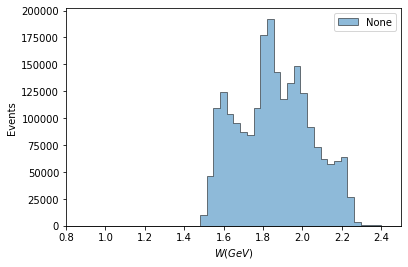

In [3]:
kin = kinematics.integrate("e_q2")
ax = hist.plot1d(
    kin,
    stack=True,
    fill_opts={'alpha': .5, 'edgecolor': (0,0,0,0.3)}
)


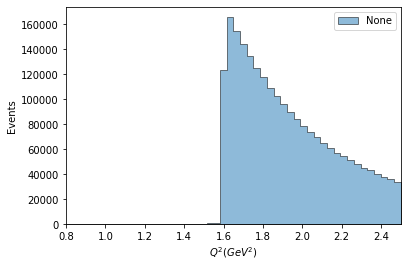

In [4]:
kin = kinematics.integrate("e_w")
ax = hist.plot1d(
    kin,
    stack=True,
    fill_opts={'alpha': .5, 'edgecolor': (0,0,0,0.3)}
)

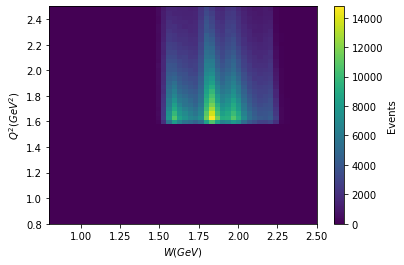

In [5]:
ax = hist.plot2d(kinematics,"e_w")

In [9]:
bh_hist = bh.Histogram(
    bh.axis.Regular(50, 0.8, 2.5),
    bh.axis.Regular(50, 0.8, 2.5),
)

bh_hist.fill(
    ((p4_beam-p4_elec)+p4_target).mass, (-(p4_beam-p4_elec).mass2)
)



Histogram(
  Regular(50, 0.8, 2.5),
  Regular(50, 0.8, 2.5),
  storage=Double()) # Sum: 64307.0 (80001.0 with flow)